# Imports and processes firn cores from SUMUP (2024) dataset and a standardized dataset compiled by Peter Kuipers Munneke

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from merge_datasets import *

In [3]:
merged_df=merge_datasets(do_run_sumup_processing=False, do_run_std_processing=False, drop_duplicates=True)


Loading SUMUP dataset from /home/nld4814/perm/cores/sumup/data/processed/sumup_550_830_density_depths_greenland.csv
Loaded 433 SUMUP records
SUMUP columns: ['core_name', 'profile_key', 'date', 'region', 'latitude', 'longitude', 'elevation', 'citation', 'n_measurements', 'max_depth', 'max_density', 'depth_to_550', 'depth_to_830', 'year', 'source', 'source_doi']

Loading standardized dataset from /home/nld4814/perm/cores/PKM/processed/PKM_550_830_density_depths_greenland.csv
Loaded 62 standardized records
Standardized columns: ['core_name', 'latitude', 'longitude', 'elevation', 'year', 'depth_to_550', 'depth_to_830', 'source', 'method', 'citation', 'measurement_count', 'source_file', 'region']

Identifying duplicates...
Found 29 potential duplicate pairs

Creating final dataset...
Removed 5 cores missing depth_to_550
Final dataset contains 464 cores

=== MERGING COMPLETE ===
Final merged dataset saved to: /home/nld4814/perm/cores/MERGED_CORE_LIST_greenland_2025.csv
Cores with 550 kg/m³ 

/etc/ecmwf/nfs/dh1_perm_b/nld4814/code/process-cores/merge_datasets.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  location_matches = location_matches[
/etc/ecmwf/nfs/dh1_perm_b/nld4814/code/process-cores/merge_datasets.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  location_matches = location_matches[
/etc/ecmwf/nfs/dh1_perm_b/nld4814/code/process-cores/merge_datasets.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  location_matches = location_matches[
/etc/ecmwf/nfs/dh1_perm_b/nld4814/code/process-cores/merge_datasets.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  location_matches = location_matches[
/etc/ecmwf/nfs/dh1_perm_b/nld4814/code/process-cores/merge_datasets.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  location_matches = location_matches[
/etc/ecmwf/nfs/dh1_perm_b/nld4814/code/process-cor

In [4]:
merged_df

,core_name,latitude,longitude,elevation,year,depth_to_550,depth_to_830,source,citation,region
0,Wegener_RA145_1930-07-21,71.192,-46.989,2155.0,1930,0.940,NaN,SUMUP 2024,Jülg (1939) as in Abermann et al. (2023),Greenland
1,Wegener_RA170_1930-07-22,71.191,-46.281,2255.0,1930,0.704,NaN,SUMUP 2024,Jülg (1939) as in Abermann et al. (2023),Greenland
2,Eismitte_1931-01-22,71.183,-39.933,3010.0,1931,8.273,NaN,SUMUP 2024,Sorge et al. (1935) as in Abermann et al. (2023),Greenland
3,Eismitte_1931-03-04,71.183,-39.933,3010.0,1931,12.921,NaN,SUMUP 2024,Sorge et al. (1935) as in Abermann et al. (2023),Greenland
4,Eismitte_1931-04-23,71.183,-39.933,3010.0,1931,14.023,NaN,SUMUP 2024,Sorge et al. (1935) as in Abermann et al. (2023),Greenland
...,...,...,...,...,...,...,...,...,...,...
459,GC-Net_KAN_U_snowpit,67.001,-47.035,1840.0,2024,0.674,NaN,SUMUP 2024,GEUS snow and firn data (2023),Greenland
460,GC-Net_NEM_core,77.441,-51.084,2454.0,2024,9.499,NaN,SUMUP 2024,GEUS snow and firn data (2023),Greenland
461,GC-Net_NSE_S1_core,66.478,-42.493,NaN,2024,7.797,NaN,SUMUP 2024,GEUS snow and firn data (2023),Greenland
462,GC-Net_SDL_S1_core,66.000,-44.502,NaN,2024,12.371,NaN,SUMUP 2024,GEUS snow and firn data (2023),Greenland


<Axes: title={'center': 'Depth to 830 kg/m³ '}, xlabel='Longitude', ylabel='Latitude'>

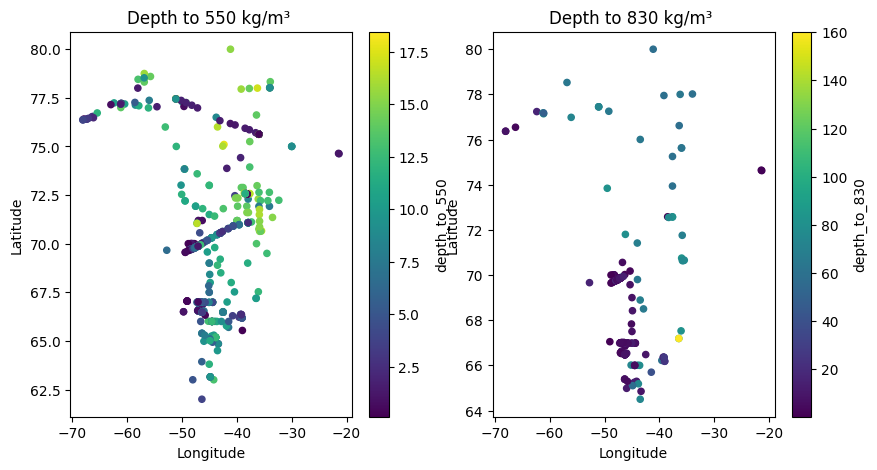

In [5]:
# plot cores

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10, 5))
merged_df.plot.scatter(x='longitude', y='latitude', c='depth_to_550', title='Depth to 550 kg/m³ ', xlabel='Longitude', ylabel='Latitude', ax=ax[0])
merged_df.plot.scatter(x='longitude', y='latitude', c='depth_to_830', title='Depth to 830 kg/m³ ', xlabel='Longitude', ylabel='Latitude', ax=ax[1])



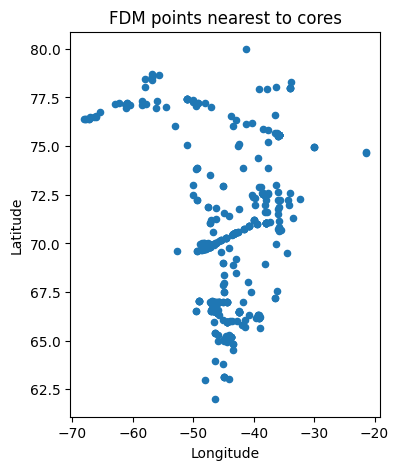

In [ ]:
# extracts FDM points nearest to cores

save_pointlist = False

# import fdm reference list
path_to_fdm_locations = "/perm/nld4814/code/IMAU-FDM/reference/FGRN055/"
pointlist_df = pd.read_csv(path_to_fdm_locations+'IN_ll_FGRN055.txt',names=["longitude","latitude"],usecols=[0,1])

core_locations = merged_df[['latitude','longitude']].to_numpy()

df = pointlist_df

xs = []; distances = []  # distance between the pair of points
for point in core_locations:

    assert len(point) == 2, "``points`` should be a tuple or list of tuples (lat, lon)"

    p_lat, p_lon = point
    # Find absolute difference between requested point and the grid coordinates.
    abslat = np.abs(df.latitude - p_lat)
    abslon = np.abs(df.longitude - p_lon)

    # Create grid of the maximum values of the two absolute grids
    c = np.maximum(abslon, abslat)

    # Find location where lat/lon minimum absolute value intersects
    x = np.where(c == np.min(c))[0][0]
    xs.append(x)

    # Matched Grid lat/lon
    g_lat = df.iloc[x,:].latitude
    g_lon = df.iloc[x,:].longitude

    R = 6373.0  # approximate radius of earth in km

    lat1 = np.deg2rad(p_lat); lon1 = np.deg2rad(p_lon)
    lat2 = np.deg2rad(g_lat); lon2 = np.deg2rad(g_lon)
    dlon = lon2 - lon1; dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    distances.append(distance)

pointlist_df.loc[xs].plot.scatter(x='longitude', y='latitude', title='FDM points nearest to cores', xlabel='Longitude', ylabel='Latitude',figsize=(4,5))

if save_pointlist:
    output_path = "/home/nld4814/perm/cores/pointlist_from_cores_2025.csv"
    pointlist_near_cores = pointlist_df.loc[xs].index.values
    np.savetxt(output_path, pointlist_near_cores, fmt='%d')